# Mini_Project-2

## This notebook is for a task on flight take off data - JFK airport

# Content:


This data was scraped under a Academic Paper under Review by IEEE transportation

This data file contains data about flights leaving from JKF ariport between Nov 2019-Dec-2020. Taxi-Out prediction has been an important concept as it helps in calculating Runway time and directly impact the cost of the flight.

# Problem Statement: 

Flight delays have a dramatic impact on the movement of taxiing aircraft between gates and runways. Taxi-out time is defined as the time between the actual pushback and wheels-off. Taxi-out time is difficult to predict in hub airports at peak hours. Consequently very long taxiing times and airport surface congestion would be suffered. The long-time taxiing aircraft may cause a blunder when dealing with the pushback and take-off slots, which not only destroys the balance of the arrival and departure process, but also increases fuel consumption and emissions. Moreover, the increasing workload of controllers is unfortunate. The delay is cumulative, but it is both stochastic and controllable in the taxi process. The stochastic characteristic is reflected in uncertainty events, such as shifts in the weather environment, the interaction of the departure/arrival aircraft surface movement, and the human factor. Controllable behaviours such as delays can be adjusted by alternating routes and taxiing speed and even by holding at gate 

Better prediction of taxi-out time allows all stakeholders to arrange the future activities in airport operation. Efficient taxi-out prediction methods are effective approaches when the aim is to eliminate delays and improve the utilization of resources. Once taxi-out time is predicted in advance, operators gain a flexibility that allows them to adjust the schedule, gates assignment, and pushback plan. This achieves the smoother operation of an airport and reduces its surface congestion and fuel-burn costs. The aim of this notebook is to develop the approaches that are more accurate predictors of the taxi-out time of departing aircraft

# Selected Model: 
Supervised Machine Learning is being used by many organizations to identify and solve business problems. The two types of algorithms commonly used are Classification and Regression.

In this notebook, the focus will be on Regression. Regression models are models which predict a continuous outcome like predicting taxi layout delay and we will implement the following linear regression models using scikit-learn:

- Linear Regression
- Ridge Regression
- Lasso Regression

# Evaluation Metrics:

We will evaluate the performance of the model using two metrics - R-squared value and Root Mean Squared Error (RMSE).

R-squared values range from 0 to 1 and are commonly stated as percentages. It is a statistical measure that represents the proportion of the variance for a target variable that is explained by the independent variables. The other commonly used metric for regression problems is RMSE, that measures the average magnitude of the residuals or error. We will be using both these metrics to evaluate the model performance.

Ideally, lower RMSE and higher R-squared values are indicative of a good model

# Steps:
In this notebook, we will follow the following steps:

Step 1 - Loading the required libraries and modules.

Step 2 - Loading the data and performing basic data checks.

Step 3 - Performing some exploratory data analysis

Step 4 - Creating dataframes for predictor and target variables.

Step 5 - Creating the training and test datasets by splitting.

Step 6 - Build, Predict and Evaluate the regression model. We will be repeating Step 5 for the various regression models.

Step 7 - Trying some usecases on regression models to test accuracy

# Step 1: Import libraries
- Import libraries to eliminate writing code from scratch


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector




%matplotlib inline

# Step 2: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# Read data in pandas
df = pd.read_csv('C:/Users/Subbu/Documents/Github2021/DSgithub/labs/Data/M1_final.csv')


df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


# Step 3:EDA



To get concise summary about datset we can use `info()` function:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

Checking number of null values present in dataset:

In [4]:
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [5]:
df.TAXI_OUT.value_counts().reset_index(name = 'count')

,index,count
0,16,2008
1,17,1978
2,15,1911
3,18,1893
4,19,1748
5,20,1676
6,14,1626
7,21,1505
8,13,1354
9,22,1352


Number of features in dataset:

In [6]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

To get statistical details about dataset, we can use `describe()` method:

In [7]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


Find correlation between features

<AxesSubplot:>

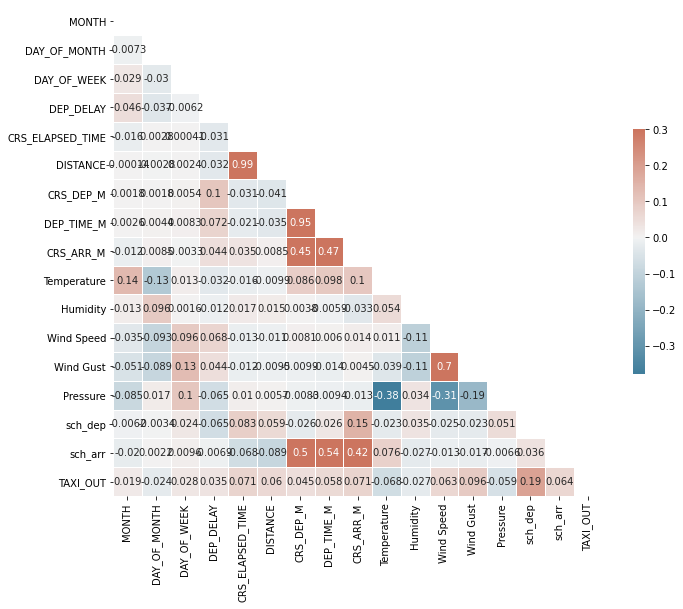

In [8]:
corr = df.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [9]:
data = df.sample(1000)

In [10]:
# sns.catplot(x="OP_UNIQUE_CARRIER", y="TAXI_OUT", hue="MONTH",kind="violin", data=data)

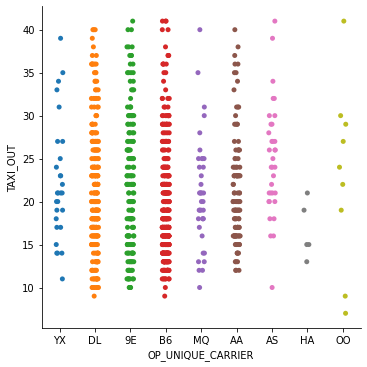

In [11]:
sns.catplot(x="OP_UNIQUE_CARRIER", y="TAXI_OUT",data=data)

Above figure interprets that more delay can be seen in 9E,B6 and DL airlines and less in OO and HA airlines.

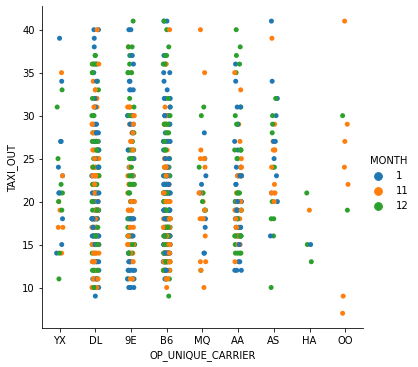

In [12]:
sns.catplot(x="OP_UNIQUE_CARRIER", y="TAXI_OUT",hue="MONTH",data=data)

Above figure interprets that more delay in all 3 months can be seen in 9E,B6 and DL airlines and less in OO and HA airlines.

In [13]:
# sns.catplot(x="OP_UNIQUE_CARRIER", y="TAXI_OUT",hue="DEST",data=data)

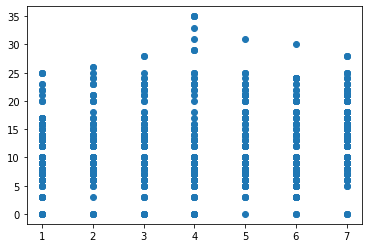

In [14]:
plt.scatter(x=data['DAY_OF_WEEK'], y=data['Wind Speed'])

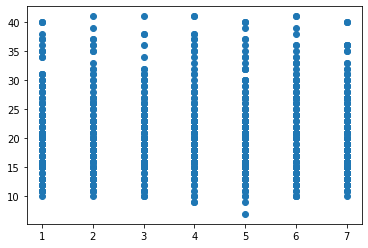

In [15]:
plt.scatter(x=data['DAY_OF_WEEK'], y=data['TAXI_OUT'])

The above figure shows that delay is more on 2nd,4th,7th days of week compared to other days.

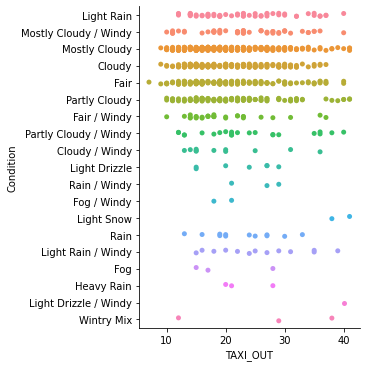

In [16]:
sns.catplot(y='Condition', x='TAXI_OUT',data=data)

from the above catplot, we can interpret that when weather condition is fair and mostly cloudly, more taxi-layoutdelay occured. 

In [17]:
# sns.catplot(y='DEP_DELAY', x='TAXI_OUT',data=data)

Find correlation between all features with respect to `TAXI_OUT` to check highly correlated features:

<AxesSubplot:title={'center':'Correlation with Taxi_out'}>

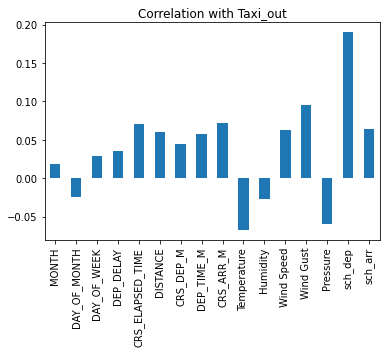

In [18]:
df.drop(columns = ['TAXI_OUT'],axis = 1).corrwith(df['TAXI_OUT']).plot(kind = 'bar',title = 'Correlation with Taxi_out')

But in the above correlation we are missing categorical values. 

# Step 4: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

Since our problem statement is to find taxi-layout delay which is a continuous variable, we are choosing regression model

X is an input variable which is also known as predictor variable

In [19]:
X = df.drop(columns = ['TAXI_OUT'],axis = 1)
X.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr'],
      dtype='object')

y is an output variable and is also known as target variable

In [20]:
y = df['TAXI_OUT']
y

0        14
1        15
2        22
3        12
4        13
         ..
28815    19
28816    22
28817    21
28818    13
28819    15
Name: TAXI_OUT, Length: 28820, dtype: int64

Find categorical features:

In [21]:
object_cols = list(X.select_dtypes(include = 'object').columns)
object_cols

['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Dew Point', 'Wind', 'Condition']

In [22]:
X['Dew Point'] = X['Dew Point'].astype(int)

In [23]:
object_cols = list(X.select_dtypes(include = 'object').columns)
object_cols

['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Wind', 'Condition']

Find numerical features:

In [24]:
numeric_cols = list(set(X.columns) - set(object_cols)) 
numeric_cols

['sch_dep',
 'sch_arr',
 'Wind Speed',
 'DEP_DELAY',
 'DAY_OF_WEEK',
 'CRS_DEP_M',
 'Dew Point',
 'CRS_ELAPSED_TIME',
 'Pressure',
 'DAY_OF_MONTH',
 'Wind Gust',
 'MONTH',
 'DISTANCE',
 'DEP_TIME_M',
 'CRS_ARR_M',
 'Humidity',
 'Temperature']

Using One-hot encoding to convert categocial features into numerical features, so that we can predict target variable

In [25]:
X_Obj = pd.get_dummies(X, columns=['OP_UNIQUE_CARRIER', 'Condition'])
X_Obj.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'TAIL_NUM', 'DEST', 'DEP_DELAY',
       'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M',
       'Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed',
       'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'OP_UNIQUE_CARRIER_9E',
       'OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_AS', 'OP_UNIQUE_CARRIER_B6',
       'OP_UNIQUE_CARRIER_DL', 'OP_UNIQUE_CARRIER_HA', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_YX', 'Condition_Cloudy',
       'Condition_Cloudy / Windy', 'Condition_Drizzle and Fog',
       'Condition_Fair', 'Condition_Fair / Windy', 'Condition_Fog',
       'Condition_Fog / Windy', 'Condition_Heavy Rain',
       'Condition_Heavy Rain / Windy', 'Condition_Light Drizzle',
       'Condition_Light Drizzle / Windy', 'Condition_Light Freezing Rain',
       'Condition_Light Rain', 'Condition_Light Rain / Windy',
       'Condition_Light Snow', 'Condition_Light Snow / Windy',
      

The resultant dataframe is the one where dummy features are created for given features and output can be seen in the form of 1s and 0s. 

In [26]:
X_Obj

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,11,1,5,N828JB,CHS,-1,124,636,324,323,...,0,0,0,0,0,0,0,0,0,0
1,11,1,5,N992JB,LAX,-7,371,2475,340,333,...,0,0,0,0,0,0,0,0,0,0
2,11,1,5,N959JB,FLL,40,181,1069,301,341,...,0,0,0,0,0,0,0,0,0,0
3,11,1,5,N999JQ,MCO,-2,168,944,345,343,...,0,0,0,0,0,0,0,0,0,0
4,11,1,5,N880DN,ATL,-4,139,760,360,356,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,N216JB,ORH,2,57,150,1370,1372,...,0,0,0,0,0,0,0,0,0,0
28816,1,31,5,N104NN,BOS,2,75,187,1390,1392,...,0,0,0,0,0,0,0,0,0,0
28817,1,31,5,N581AS,SEA,283,392,2422,1125,1408,...,0,0,0,0,0,0,0,0,0,0
28818,1,31,5,N957JB,SJU,5,224,1598,1417,1422,...,0,0,0,0,0,0,0,0,0,0


Since we assume TAIL_NUM,DEST,WIND are not important, we are dropping these features

In [27]:
X_new = X_Obj.drop(columns = ['TAIL_NUM','DEST','Wind'])
X_new

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,11,1,5,-1,124,636,324,323,448,48,...,0,0,0,0,0,0,0,0,0,0
1,11,1,5,-7,371,2475,340,333,531,48,...,0,0,0,0,0,0,0,0,0,0
2,11,1,5,40,181,1069,301,341,482,48,...,0,0,0,0,0,0,0,0,0,0
3,11,1,5,-2,168,944,345,343,513,48,...,0,0,0,0,0,0,0,0,0,0
4,11,1,5,-4,139,760,360,356,499,46,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1370,1372,1427,39,...,0,0,0,0,0,0,0,0,0,0
28816,1,31,5,2,75,187,1390,1392,25,39,...,0,0,0,0,0,0,0,0,0,0
28817,1,31,5,283,392,2422,1125,1408,1337,39,...,0,0,0,0,0,0,0,0,0,0
28818,1,31,5,5,224,1598,1417,1422,261,39,...,0,0,0,0,0,0,0,0,0,0


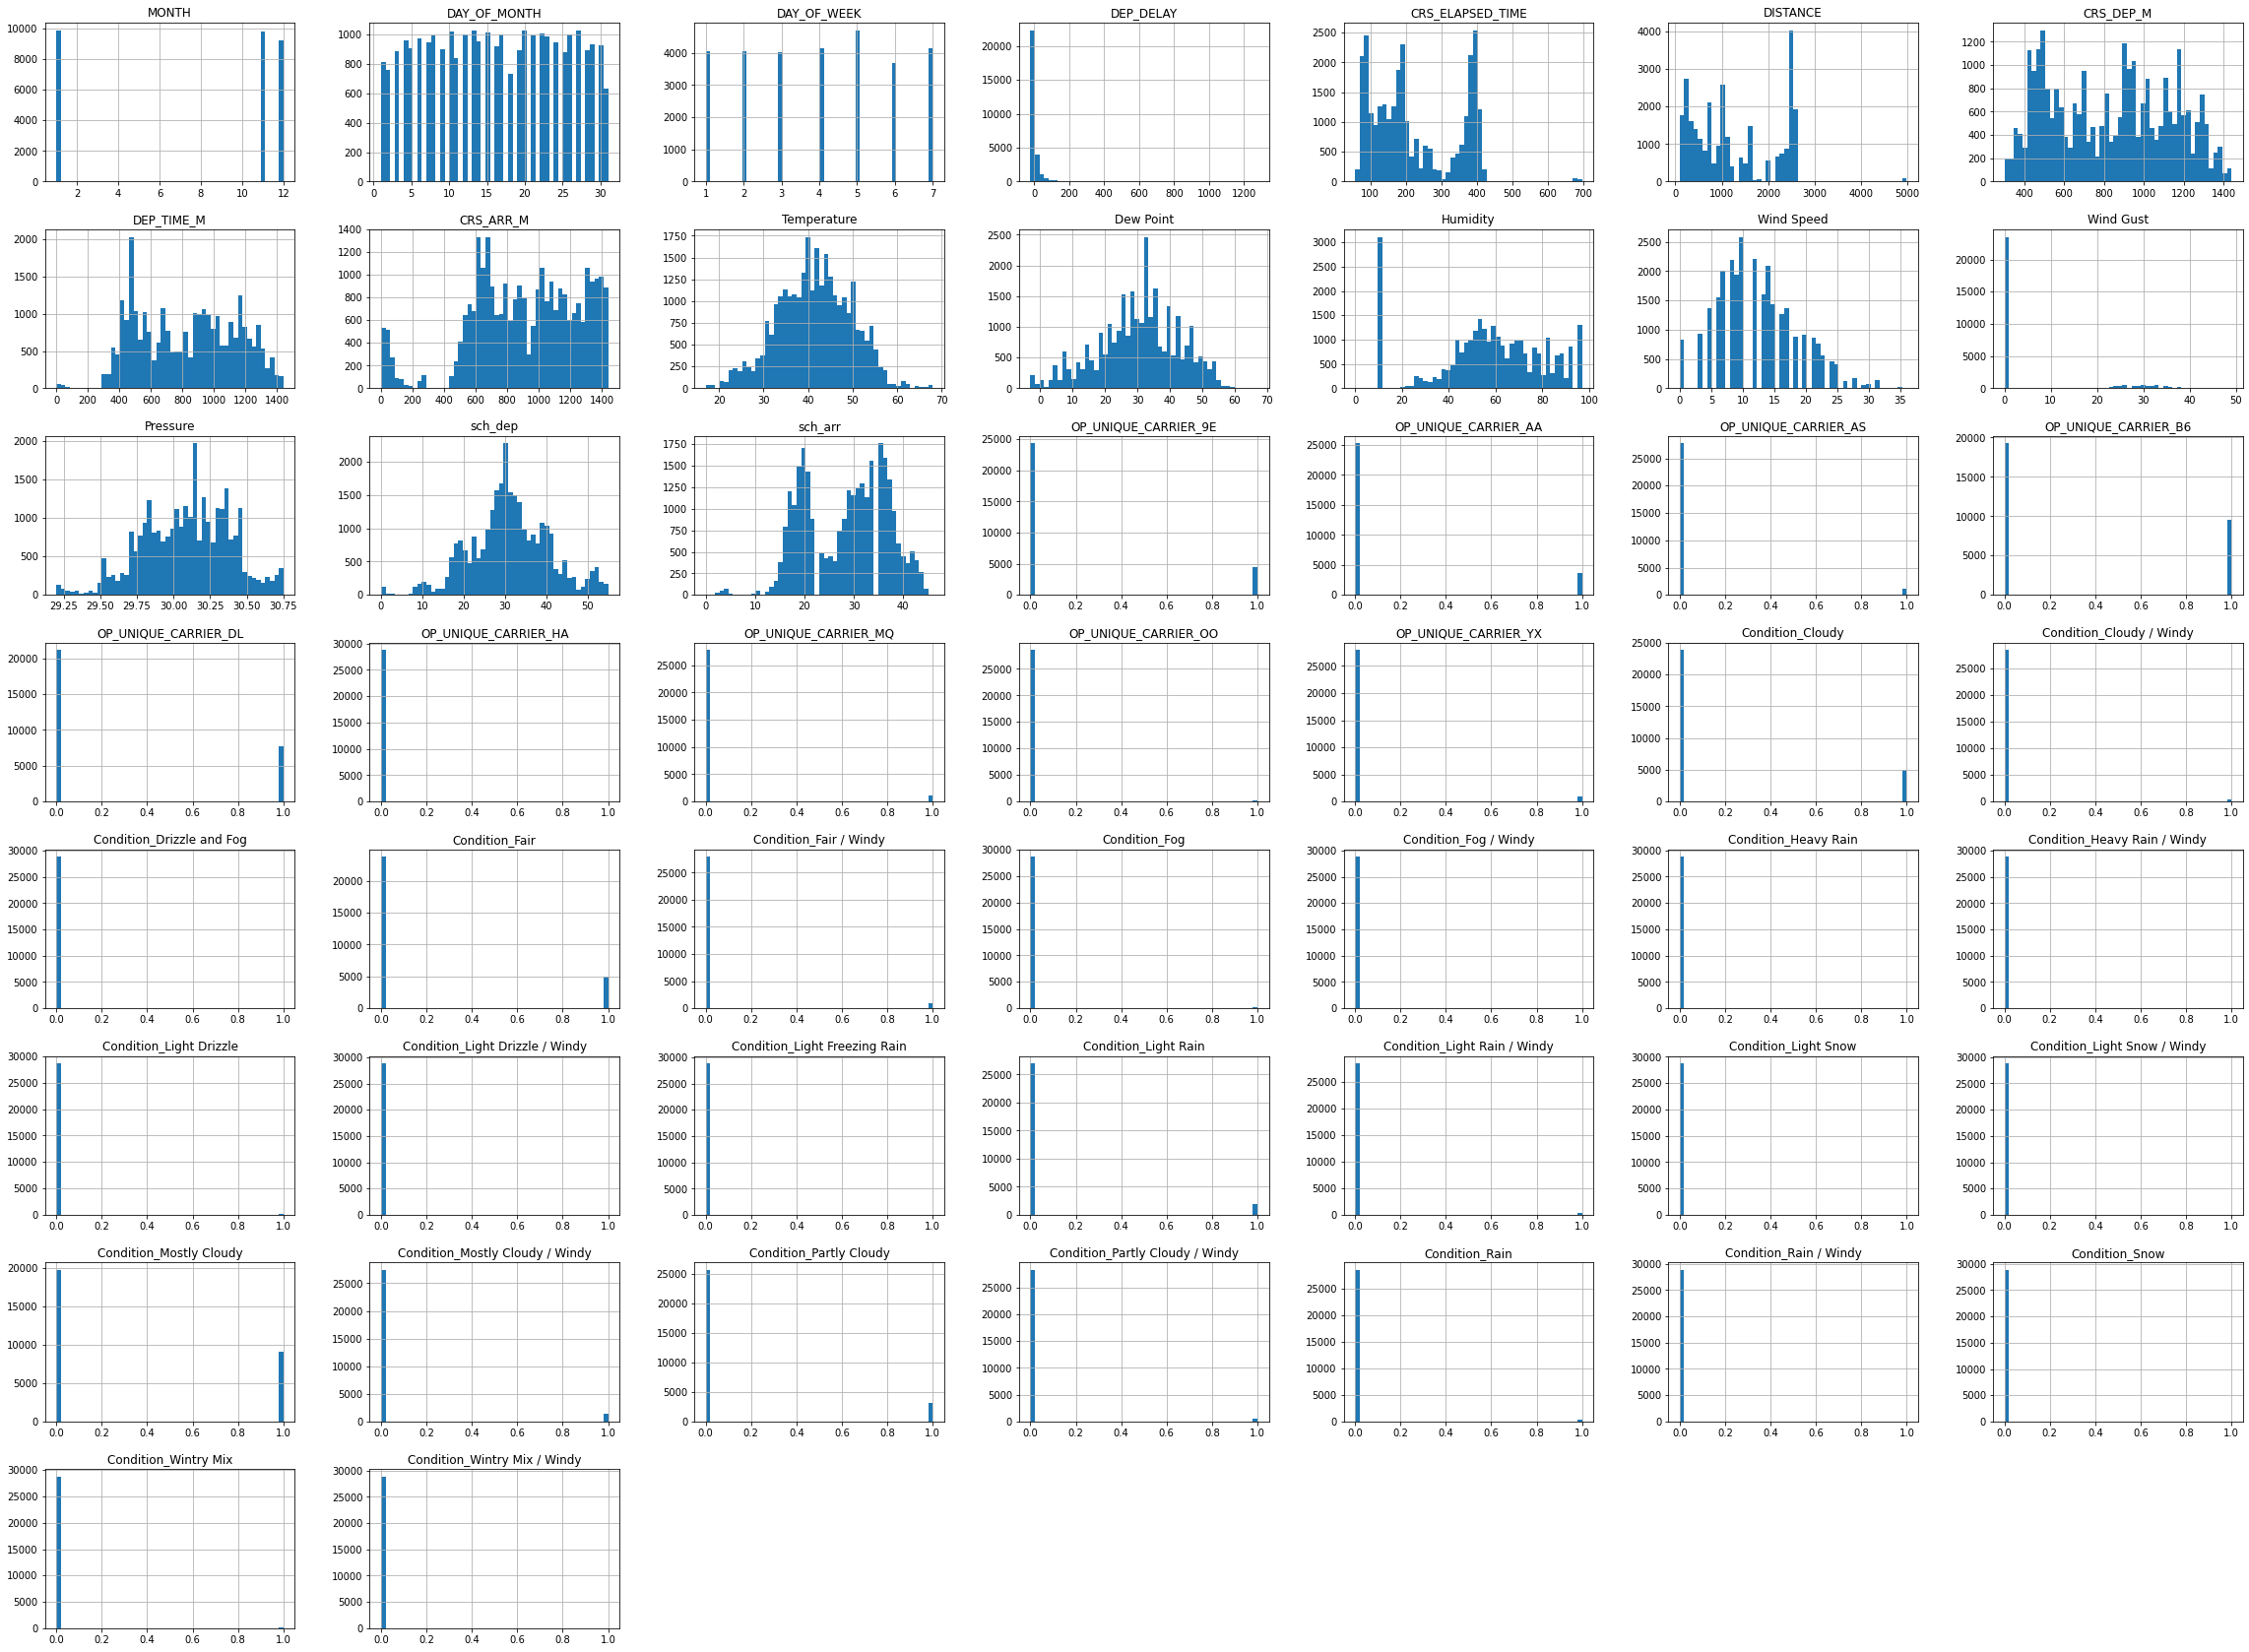

In [28]:
X_new.hist(bins = 50, figsize = (40, 30))
plt.show()

Find all features of new dataframe:

In [29]:
X_new.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME',
       'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature',
       'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure',
       'sch_dep', 'sch_arr', 'OP_UNIQUE_CARRIER_9E', 'OP_UNIQUE_CARRIER_AA',
       'OP_UNIQUE_CARRIER_AS', 'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_DL',
       'OP_UNIQUE_CARRIER_HA', 'OP_UNIQUE_CARRIER_MQ', 'OP_UNIQUE_CARRIER_OO',
       'OP_UNIQUE_CARRIER_YX', 'Condition_Cloudy', 'Condition_Cloudy / Windy',
       'Condition_Drizzle and Fog', 'Condition_Fair', 'Condition_Fair / Windy',
       'Condition_Fog', 'Condition_Fog / Windy', 'Condition_Heavy Rain',
       'Condition_Heavy Rain / Windy', 'Condition_Light Drizzle',
       'Condition_Light Drizzle / Windy', 'Condition_Light Freezing Rain',
       'Condition_Light Rain', 'Condition_Light Rain / Windy',
       'Condition_Light Snow', 'Condition_Light Snow / Windy',
       'Condition_Mostly Cloudy', 'Condit

# Step 5: Split the Data

Need to check for **Supervised->Regression** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.2,random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23056, 51)
(5764, 51)
(23056,)
(5764,)


We have splitted predictor features dataframe(X_new) and target features dataframe(y) into 80/20 training and testing datasets 

# Step 6: Define,Fit,Verify listed regression models

Define the model and its hyper-parameters.

- Fit model with training data
- Use the **Predictor's testing** data to make predictions
- What metrics are appropriate for the modelling approach used: Mean_squared_erros, R2 score

**Linear Regression**

The simplest form of regression is the linear regression, which assumes that the predictors have a linear relationship with the target variable. The input variables are assumed to have a Gaussian distribution. Another assumption is that the predictors are not highly correlated with each other (a problem called multi-collinearity).

The linear regression equation can be expressed in the following form:

y = a1x1 + a2x2 + a3x3 + ..... + anxn + b

In [31]:
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X_train,y_train)

lr_rms = (mean_squared_error(y_test,lr.predict(X_test))**0.5)
print(lr_rms)

6.467406331511011


In [32]:
lr_score = (r2_score(y_test,lr.predict(X_test)))
lr_score

0.11546327015476432

In the above 2 cells, we have created our LinearRegression model,fitted model with training datasets, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.46 and r2score 0.11547 which can also be respresented as 11.5% which is less than baseline score.

**Regularized Regression**

As discussed above, linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients. The following sections of the guide will discuss the various regularization algorithms.

**Ridge Regression**

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

In scikit-learn, a ridge regression model is constructed by using the Ridge class. The first line of code below instantiates the Ridge Regression model. The second line fits the model to the training data.

The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared.


In [33]:
rr = Ridge()

rr.fit(X_train,y_train)

rr_rms = (mean_squared_error(y_test,rr.predict(X_test))**0.5)
print(rr_rms)

rr_score = (r2_score(y_test,rr.predict(X_test)))
rr_score

6.467443859992416


0.11545300470526931

In the above cell, we have created our RidgeRegression model,fitted model with training datasets, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.46 and r2score 0.11545 which can also be respresented as 11.5% which is less than baseline score.

In [34]:
# reg1 = RidgeCV()
# reg1.fit(X_new, y)
# print("Best alpha using built-in LassoCV: %f" % reg1.alpha_)
# print("Best score using built-in LassoCV: %f" %reg1.score(X_new,y))
# coef = pd.Series(reg1.coef_, index = X_new.columns)
# coef

In [35]:
# rr = Ridge(alpha = 0.1,normalize = True)

# rr.fit(X_train,y_train)

# rr_rms = (mean_squared_error(y_test,rr.predict(X_test))**0.5)
# print(rr_rms)

# rr_score = (r2_score(y_test,rr.predict(X_test)))
# rr_score

**Lasso Regression**

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).


In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

In scikit-learn, a lasso regression model is constructed by using the Lasso class. The first line of code below instantiates the Lasso Regression model. The second line fits the model to the training data.

The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared.

In [36]:
Lr = Lasso()

Lr.fit(X_train,y_train)

Lr_rms = (mean_squared_error(y_test,Lr.predict(X_test))**0.5)
print(Lr_rms)

Lr_score = (r2_score(y_test,Lr.predict(X_test)))
Lr_score

6.611837632185153


0.07551485639119238

In the above 2 cells, we have created our LassoRegression model,fitted model with training datasets, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.61 and r2score 0.075515 which can also be respresented as 7.6% which is less than baseline score.

# Step 7: - Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

Since, we didn't achieve satisfactory results for any of the above created models, we are trying to initialize some more models by using some tuning parameters. 

Using **LassoCV** model to get best alpha to improve model's score

In [37]:
reg = LassoCV()
reg.fit(X_new, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_new,y))
coef = pd.Series(reg.coef_, index = X_new.columns)
coef

Best alpha using built-in LassoCV: 0.364733
Best score using built-in LassoCV: 0.081014


MONTH                              0.033875
DAY_OF_MONTH                      -0.019965
DAY_OF_WEEK                        0.000000
DEP_DELAY                          0.004826
CRS_ELAPSED_TIME                   0.026293
DISTANCE                          -0.003105
CRS_DEP_M                         -0.000042
DEP_TIME_M                         0.000944
CRS_ARR_M                          0.000402
Temperature                       -0.185791
Dew Point                          0.110446
Humidity                          -0.012349
Wind Speed                         0.004754
Wind Gust                          0.064357
Pressure                          -0.000000
sch_dep                            0.117617
sch_arr                            0.028197
OP_UNIQUE_CARRIER_9E               0.000000
OP_UNIQUE_CARRIER_AA              -0.000000
OP_UNIQUE_CARRIER_AS               0.000000
OP_UNIQUE_CARRIER_B6              -0.000000
OP_UNIQUE_CARRIER_DL               0.000000
OP_UNIQUE_CARRIER_HA            

Finding best features based on **coefficients**

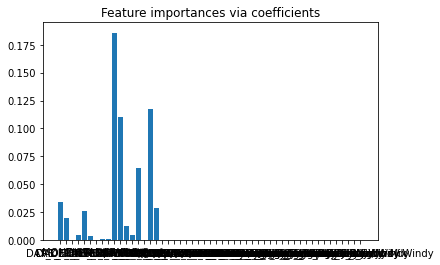

In [38]:
importance = np.abs(reg.coef_)
feature_names = np.array(X_new.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

Since, we are not clear with above listed ones, we are using below models. 

Performing **feature engineering** by importing **SelectFromModel**

In [39]:
from sklearn.feature_selection import SelectFromModel
from time import time

# threshold = np.sort(importance)[-6] - 0.01

# tic = time()
# sfm = SelectFromModel(reg, threshold=threshold).fit(X_new, y)
# toc = time()
# print("Features selected by SelectFromModel: "f"{feature_names[sfm.get_support()]}")
# print(f"Done in {toc - tic:.3f}s")

Performing **feature engineering** by importing **SequentialFeatureSelector** 

Using Linearregression model and trying different number of features in forward direction to improve model's score

In [40]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(lr, n_features_to_select=15, direction='forward').fit(X_new, y)
toc_fwd = time()

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['DEP_DELAY' 'DEP_TIME_M' 'Temperature' 'Dew Point' 'Wind Gust' 'sch_dep'
 'sch_arr' 'OP_UNIQUE_CARRIER_AS' 'OP_UNIQUE_CARRIER_B6'
 'Condition_Fair / Windy' 'Condition_Fog' 'Condition_Light Rain'
 'Condition_Light Snow' 'Condition_Rain' 'Condition_Wintry Mix']
Done in 45.474s


In [41]:
X_15l = X_new[['DEP_DELAY','DEP_TIME_M','Temperature','Dew Point','Wind Gust','sch_dep','sch_arr','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_B6','Condition_Fair / Windy','Condition_Fog','Condition_Light Rain','Condition_Light Snow','Condition_Rain','Condition_Wintry Mix']]

X_15l_train,X_15l_test,y_train,y_test = train_test_split(X_15l,y,test_size = 0.2,random_state = 1)


lr.fit(X_15l_train,y_train)

lr_rms_15l = (mean_squared_error(y_test,lr.predict(X_15l_test))**0.5)
print(lr_rms_15l)

lr_score_15l = (r2_score(y_test,lr.predict(X_15l_test)))
lr_score_15l

6.49101024532557


0.10899494960738076

In the above 2 cells, we have used SequentialFeatureSelector and did feature engineering by selecting top 15 features to increase model's efficiency. So after getting features, we created our LinearRegression model,fitted model with training datasets that contains 15 features, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.49 and r2score--0.10899 which can also be respresented as 10.9% which is less than baseline score.

In [42]:
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(lr, n_features_to_select=25, direction='forward').fit(X_new, y)
toc_fwd = time()

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['DAY_OF_MONTH' 'DAY_OF_WEEK' 'DEP_DELAY' 'DISTANCE' 'DEP_TIME_M'
 'Temperature' 'Dew Point' 'Wind Gust' 'sch_dep' 'sch_arr'
 'OP_UNIQUE_CARRIER_AA' 'OP_UNIQUE_CARRIER_AS' 'OP_UNIQUE_CARRIER_B6'
 'OP_UNIQUE_CARRIER_YX' 'Condition_Cloudy / Windy'
 'Condition_Fair / Windy' 'Condition_Fog' 'Condition_Fog / Windy'
 'Condition_Heavy Rain' 'Condition_Light Rain'
 'Condition_Light Rain / Windy' 'Condition_Light Snow'
 'Condition_Partly Cloudy / Windy' 'Condition_Rain' 'Condition_Wintry Mix']
Done in 97.614s


In [43]:
X_25l = X_new[['DAY_OF_MONTH','DAY_OF_WEEK','DEP_DELAY','DISTANCE','DEP_TIME_M','Temperature','Dew Point','Wind Gust','sch_dep','sch_arr','OP_UNIQUE_CARRIER_AA','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_B6','OP_UNIQUE_CARRIER_YX','Condition_Cloudy / Windy','Condition_Fair / Windy','Condition_Fog','Condition_Fog / Windy','Condition_Heavy Rain','Condition_Light Rain','Condition_Light Rain / Windy','Condition_Light Snow','Condition_Partly Cloudy / Windy','Condition_Rain','Condition_Wintry Mix']]

X_25l_train,X_25l_test,y_train,y_test = train_test_split(X_25l,y,test_size = 0.2,random_state = 1)


lr.fit(X_25l_train,y_train)

lr_rms_25l = (mean_squared_error(y_test,lr.predict(X_25l_test))**0.5)
print(lr_rms_25l)

lr_score_25l = (r2_score(y_test,lr.predict(X_25l_test)))
lr_score_25l

6.484625883677805


0.11074681895872984

In the above 2 cells, we have used SequentialFeatureSelector and did feature engineering by selecting top 25 features to increase model's efficiency. So after getting features, we created our LinearRegression model,fitted model with training datasets that contains 25 features, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.48 and r2score--0.110747 which can also be respresented as 11% which is less than baseline score.

In [44]:
tic_fwd = time()
sfs_backward = SequentialFeatureSelector(lr, n_features_to_select=25, direction='backward').fit(X_new, y)
toc_fwd = time()

print("Features selected by backward sequential selection: "f"{feature_names[sfs_backward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by backward sequential selection: ['DEP_DELAY' 'DISTANCE' 'DEP_TIME_M' 'Temperature' 'Dew Point' 'Wind Gust'
 'sch_dep' 'sch_arr' 'OP_UNIQUE_CARRIER_9E' 'OP_UNIQUE_CARRIER_AA'
 'OP_UNIQUE_CARRIER_AS' 'OP_UNIQUE_CARRIER_DL' 'OP_UNIQUE_CARRIER_MQ'
 'OP_UNIQUE_CARRIER_YX' 'Condition_Cloudy' 'Condition_Cloudy / Windy'
 'Condition_Fair' 'Condition_Fair / Windy' 'Condition_Light Rain'
 'Condition_Light Snow' 'Condition_Mostly Cloudy'
 'Condition_Mostly Cloudy / Windy' 'Condition_Partly Cloudy'
 'Condition_Partly Cloudy / Windy' 'Condition_Wintry Mix']
Done in 315.615s


In [45]:
X_25bl = X_new[['DEP_DELAY','DISTANCE','DEP_TIME_M','Temperature','Dew Point','Wind Gust','sch_dep','sch_arr','OP_UNIQUE_CARRIER_9E','OP_UNIQUE_CARRIER_AA','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_DL','OP_UNIQUE_CARRIER_MQ','OP_UNIQUE_CARRIER_YX','Condition_Cloudy','Condition_Cloudy / Windy','Condition_Fair','Condition_Fair / Windy','Condition_Light Rain','Condition_Light Snow','Condition_Mostly Cloudy','Condition_Mostly Cloudy / Windy','Condition_Partly Cloudy','Condition_Partly Cloudy / Windy','Condition_Wintry Mix']]

X_25bl_train,X_25bl_test,y_train,y_test = train_test_split(X_25bl,y,test_size = 0.2,random_state = 1)


lr.fit(X_25bl_train,y_train)

lr_rms_25bl = (mean_squared_error(y_test,lr.predict(X_25bl_test))**0.5)
print(lr_rms_25bl)

lr_score_25bl = (r2_score(y_test,lr.predict(X_25bl_test)))
lr_score_25bl

6.487033061340127


0.11008649167401507

Using **RidgeRegression** and trying different **number of features** in **forward** direction to improve model's score

In [46]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV()

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=5,direction='forward').fit(X_new, y)
toc_fwd = time()

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['Wind Gust' 'sch_dep' 'OP_UNIQUE_CARRIER_AS' 'OP_UNIQUE_CARRIER_B6'
 'Condition_Light Snow']
Done in 18.147s


In [47]:
X_5r = X_new[['Wind Gust','sch_dep','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_B6','Condition_Light Snow']]

X_5r_train,X_5r_test,y_train,y_test = train_test_split(X_5r,y,test_size = 0.2,random_state = 1)

rr = Ridge()

rr.fit(X_5r_train,y_train)

rr_rms_5r = (mean_squared_error(y_test,rr.predict(X_5r_test))**0.5)
print(rr_rms_5r)

rr_score_5r = (r2_score(y_test,rr.predict(X_5r_test)))
rr_score_5r

6.606791957918872


0.07692531783827361

In the above 2 cells, we have used SequentialFeatureSelector and did feature engineering by selecting top 5 features to increase model's efficiency. So after getting features, we created our RidgeRegression model,fitted model with training datasets that contains 5 features, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.607 and r2score--0.0769 which can also be respresented as 7.7% which is less than baseline score.

In [48]:
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=15,
                                        direction='forward').fit(X_new, y)
toc_fwd = time()

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['DEP_DELAY' 'DEP_TIME_M' 'Temperature' 'Dew Point' 'Wind Gust' 'sch_dep'
 'sch_arr' 'OP_UNIQUE_CARRIER_AS' 'OP_UNIQUE_CARRIER_B6'
 'Condition_Fair / Windy' 'Condition_Fog' 'Condition_Light Rain'
 'Condition_Light Snow' 'Condition_Rain' 'Condition_Wintry Mix']
Done in 97.093s


In [49]:
X_15r = X_new[['DEP_DELAY','DEP_TIME_M','Temperature','Dew Point','Wind Gust','sch_dep','sch_arr','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_B6','Condition_Fair / Windy','Condition_Fog','Condition_Light Rain','Condition_Light Snow','Condition_Rain','Condition_Wintry Mix']]

X_15r_train,X_15r_test,y_train,y_test = train_test_split(X_15r,y,test_size = 0.2,random_state = 1)

rr = Ridge()

rr.fit(X_15r_train,y_train)

rr_rms_15r = (mean_squared_error(y_test,rr.predict(X_15r_test))**0.5)
print(rr_rms_15r)

rr_score_15r = (r2_score(y_test,rr.predict(X_15r_test)))
rr_score_15r

6.49091780732793


0.10902032690095187

In the above 2 cells, we have used SequentialFeatureSelector and did feature engineering by selecting top 15 features to increase model's efficiency. So after getting features, we created our RidgeRegression model,fitted model with training datasets that contains 15 features, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.49 and r2score--0.10902 which can also be respresented as 10.9% which is less than baseline score.

In [50]:
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=25, direction='forward').fit(X_new, y)
toc_fwd = time()

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['DAY_OF_MONTH' 'DAY_OF_WEEK' 'DEP_DELAY' 'DISTANCE' 'DEP_TIME_M'
 'Temperature' 'Dew Point' 'Wind Gust' 'sch_dep' 'sch_arr'
 'OP_UNIQUE_CARRIER_AA' 'OP_UNIQUE_CARRIER_AS' 'OP_UNIQUE_CARRIER_B6'
 'OP_UNIQUE_CARRIER_YX' 'Condition_Fair / Windy' 'Condition_Fog'
 'Condition_Fog / Windy' 'Condition_Heavy Rain'
 'Condition_Light Freezing Rain' 'Condition_Light Rain'
 'Condition_Light Rain / Windy' 'Condition_Light Snow'
 'Condition_Partly Cloudy / Windy' 'Condition_Rain' 'Condition_Wintry Mix']
Done in 217.122s


In [51]:
X_25r = X_new[['DAY_OF_MONTH','DAY_OF_WEEK','DEP_DELAY','DISTANCE','DEP_TIME_M','Temperature','Dew Point','Wind Gust','sch_dep','sch_arr','OP_UNIQUE_CARRIER_AA','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_B6','OP_UNIQUE_CARRIER_YX','Condition_Fair / Windy','Condition_Fog','Condition_Fog / Windy','Condition_Heavy Rain','Condition_Light Freezing Rain','Condition_Light Rain','Condition_Light Rain / Windy','Condition_Light Snow','Condition_Partly Cloudy / Windy','Condition_Rain','Condition_Wintry Mix']]

X_25r_train,X_25r_test,y_train,y_test = train_test_split(X_25r,y,test_size = 0.2,random_state = 1)

rr = Ridge()

rr.fit(X_25r_train,y_train)

rr_rms_25r = (mean_squared_error(y_test,rr.predict(X_25r_test))**0.5)
print(rr_rms_25r)

rr_score_25r = (r2_score(y_test,rr.predict(X_25r_test)))
rr_score_25r

6.48471148284267


0.11072334194296507

In the above 2 cells, we have used SequentialFeatureSelector and did feature engineering by selecting top 25 features to increase model's efficiency. So after getting features, we created our RidgeRegression model,fitted model with training datasets that contains 25 features, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.48 and r2score--0.11072 which can also be respresented as 11.07% which is less than baseline score.

In [52]:
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=35, direction='forward').fit(X_new, y)
toc_fwd = time()

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['DAY_OF_MONTH' 'DAY_OF_WEEK' 'DEP_DELAY' 'DISTANCE' 'DEP_TIME_M'
 'CRS_ARR_M' 'Temperature' 'Dew Point' 'Humidity' 'Wind Gust' 'sch_dep'
 'sch_arr' 'OP_UNIQUE_CARRIER_AA' 'OP_UNIQUE_CARRIER_AS'
 'OP_UNIQUE_CARRIER_B6' 'OP_UNIQUE_CARRIER_DL' 'OP_UNIQUE_CARRIER_HA'
 'OP_UNIQUE_CARRIER_YX' 'Condition_Cloudy' 'Condition_Cloudy / Windy'
 'Condition_Fair' 'Condition_Fair / Windy' 'Condition_Fog'
 'Condition_Fog / Windy' 'Condition_Heavy Rain'
 'Condition_Heavy Rain / Windy' 'Condition_Light Drizzle / Windy'
 'Condition_Light Freezing Rain' 'Condition_Light Rain'
 'Condition_Light Rain / Windy' 'Condition_Light Snow'
 'Condition_Partly Cloudy / Windy' 'Condition_Rain' 'Condition_Wintry Mix'
 'Condition_Wintry Mix / Windy']
Done in 340.127s


In [53]:
X_35r = X_new[['DAY_OF_MONTH','DAY_OF_WEEK','DEP_DELAY','DISTANCE','DEP_TIME_M','CRS_ARR_M','Temperature','Dew Point','Humidity','Wind Gust','sch_dep','sch_arr','OP_UNIQUE_CARRIER_AA','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_B6','OP_UNIQUE_CARRIER_DL','OP_UNIQUE_CARRIER_HA','OP_UNIQUE_CARRIER_YX','Condition_Cloudy','Condition_Cloudy / Windy','Condition_Fair','Condition_Fair / Windy','Condition_Fog','Condition_Fog / Windy','Condition_Heavy Rain','Condition_Heavy Rain / Windy','Condition_Light Drizzle / Windy','Condition_Light Freezing Rain','Condition_Light Rain','Condition_Light Rain / Windy','Condition_Light Snow','Condition_Partly Cloudy / Windy','Condition_Rain','Condition_Wintry Mix','Condition_Wintry Mix / Windy']]

X_35r_train,X_35r_test,y_train,y_test = train_test_split(X_35r,y,test_size = 0.2,random_state = 1)

rr = Ridge()

rr.fit(X_35r_train,y_train)

rr_rms_35r = (mean_squared_error(y_test,rr.predict(X_35r_test))**0.5)
print(rr_rms_35r)

rr_score_35r = (r2_score(y_test,rr.predict(X_35r_test)))
rr_score_35r

6.475401297239412


0.11327500130020973

In the above 2 cells, we have used SequentialFeatureSelector and did feature engineering by selecting top 35 features to increase model's efficiency. So after getting features, we created our RidgeRegression model,fitted model with training datasets that contains 35 features, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.47 and r2score--0.11327 which can also be respresented as 11.32% which is less than baseline score.

Using **LassoRegression** and trying different **number of features** in **forward** direction to improve model'score 

In [54]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=5,direction='forward').fit(X_new, y)
toc_fwd = time()

# tic_bwd = time()
# sfs_backward = SequentialFeatureSelector(reg, n_features_to_select=2,
#                                          direction='backward').fit(X_new, y)
# toc_bwd = time()

print("Features selected by forward sequential selection: "
      f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
# print("Features selected by backward sequential selection: "
#       f"{feature_names[sfs_backward.get_support()]}")
# print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['Wind Gust' 'sch_dep' 'OP_UNIQUE_CARRIER_AS' 'OP_UNIQUE_CARRIER_B6'
 'Condition_Light Snow']
Done in 264.754s


In [55]:
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=15,direction='forward').fit(X_new, y)
toc_fwd = time()

# tic_bwd = time()
# sfs_backward = SequentialFeatureSelector(reg, n_features_to_select=2,
#                                          direction='backward').fit(X_new, y)
# toc_bwd = time()

print("Features selected by forward sequential selection: "
      f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
# print("Features selected by backward sequential selection: "
#       f"{feature_names[sfs_backward.get_support()]}")
# print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['DAY_OF_MONTH' 'DEP_DELAY' 'Temperature' 'Dew Point' 'Wind Gust'
 'sch_dep' 'sch_arr' 'OP_UNIQUE_CARRIER_AS' 'OP_UNIQUE_CARRIER_B6'
 'Condition_Fair / Windy' 'Condition_Fog' 'Condition_Light Rain'
 'Condition_Light Snow' 'Condition_Rain' 'Condition_Wintry Mix']
Done in 771.249s


In [56]:
X_15f = X_new[['DAY_OF_MONTH','DEP_DELAY','Temperature','Dew Point','Wind Gust','sch_dep','sch_arr','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_B6','Condition_Fair / Windy','Condition_Fog','Condition_Light Rain','Condition_Light Snow','Condition_Rain','Condition_Wintry Mix']]

X_15f_train,X_15f_test,y_train,y_test = train_test_split(X_15f,y,test_size = 0.2,random_state = 1)

Lr = Lasso()

Lr.fit(X_15f_train,y_train)

Lr_rms_15f = (mean_squared_error(y_test,Lr.predict(X_15f_test))**0.5)
print(Lr_rms_15f)

Lr_score_15f = (r2_score(y_test,Lr.predict(X_15f_test)))
Lr_score_15f

6.638409159928251


0.06806931865900123

In the above 2 cells, we have used SequentialFeatureSelector and did feature engineering by selecting top 15 features to increase model's efficiency. So after getting features, we created our LassoRegression model,fitted model with training datasets that contains 15 features, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.64 and r2score--0.0681 which can also be respresented as 6.8% which is less than baseline score.

In [57]:
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=25,direction='forward').fit(X_new, y)
toc_fwd = time()

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")


Features selected by forward sequential selection: ['DAY_OF_MONTH' 'DAY_OF_WEEK' 'DEP_DELAY' 'Temperature' 'Dew Point'
 'Humidity' 'Wind Gust' 'sch_dep' 'sch_arr' 'OP_UNIQUE_CARRIER_AA'
 'OP_UNIQUE_CARRIER_AS' 'OP_UNIQUE_CARRIER_B6' 'OP_UNIQUE_CARRIER_YX'
 'Condition_Cloudy' 'Condition_Fair' 'Condition_Fair / Windy'
 'Condition_Fog' 'Condition_Fog / Windy' 'Condition_Heavy Rain'
 'Condition_Heavy Rain / Windy' 'Condition_Light Rain'
 'Condition_Light Rain / Windy' 'Condition_Light Snow' 'Condition_Rain'
 'Condition_Wintry Mix']
Done in 1233.930s


In [58]:
X_25f = X_new[['DAY_OF_MONTH','DAY_OF_WEEK','DEP_DELAY','Temperature','Dew Point','Humidity','Wind Gust','sch_dep','sch_arr','OP_UNIQUE_CARRIER_AA','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_B6','OP_UNIQUE_CARRIER_YX','Condition_Cloudy','Condition_Fair','Condition_Fair / Windy','Condition_Fog','Condition_Fog / Windy','Condition_Heavy Rain','Condition_Heavy Rain / Windy','Condition_Light Rain','Condition_Light Rain / Windy','Condition_Light Snow','Condition_Rain','Condition_Wintry Mix']]

X_25f_train,X_25f_test,y_train,y_test = train_test_split(X_25f,y,test_size = 0.2,random_state = 1)

Lr = Lasso()

Lr.fit(X_25f_train,y_train)

Lr_rms_25f = (mean_squared_error(y_test,Lr.predict(X_25f_test))**0.5)
print(Lr_rms_25f)

Lr_score_25f = (r2_score(y_test,Lr.predict(X_25f_test)))
Lr_score_25f

6.633311495908195


0.06950003657918213

In the above 2 cells, we have used SequentialFeatureSelector and did feature engineering by selecting top 25 features to increase model's efficiency. So after getting features, we created our LassorRegression model,fitted model with training datasets that contains 25 features, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.63 and r2score--0.069500 which can also be respresented as 6.9% which is less than baseline score.

In [59]:
# from sklearn.neighbors import KNeighborsRegressor

# neigh = KNeighborsRegressor(n_neighbors=2)
# neigh.fit(X_new, y)
# KNeighborsRegressor(...)
# print(neigh.predict([[1.5]]))

In [60]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsRegressor

# params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,15,20,24,25]}

# knn = KNeighborsRegressor()

# model = GridSearchCV(knn, params, cv=5)
# model.fit(X_train,y_train)
# model.best_params_

In [61]:
# knn = KNeighborsRegressor(n_neighbors = 25)
# model.fit(X_train,y_train)
# y_preds = model.predict(X_test)
# mse = mean_squared_error(y_test, y_preds)
# rmse = (mse) ** 0.5
# print(rmse)
# score= (r2_score(y_test,y_preds))
# score

In [62]:
# knn = KNeighborsRegressor(n_neighbors = 9)
# model.fit(X_train,y_train)
# y_preds = model.predict(X_test)
# mse = mean_squared_error(y_test, y_preds)
# rmse = (mse) ** 0.5
# print(rmse)
# score= (r2_score(y_test,y_preds))
# score

In [63]:
# #Instantiate the estimator - LogisticRegression


# lr = LinearRegression(C=1.0, random_state=1)
# #
# # Number of features

# k_features = 15

# # Instantiate SequentialBackwardSearch

# sfs = SequentialFeatureSelector(lr, k_features)

# # Fit the data to determine the k_features which give the
# # most optimal model performance

# sfs.fit(X_train, X_test, y_train, y_test)

# # Transform the training data set to dataset having k_features
# # giving most optimal model performance

# X_train_sfs = sfs.transform(X_train)

# #Transform the test data set to dataset having k_features

# X_test_sfs = sfs.transform(X_test)

In [64]:
# k_features = [len(k) for k in sfs.subsets_]
# plt.plot(k_features, sfs.scores_, marker='o')
# plt.ylim([0.01, 1.00])
# plt.ylabel('Accuracy')
# plt.xlabel('Number of features')
# plt.grid()
# plt.tight_layout()
# plt.show()

In [65]:
from sklearn import preprocessing

X_15r = X_new[['DEP_DELAY','DEP_TIME_M','Temperature','Dew Point','Wind Gust','sch_dep','sch_arr','OP_UNIQUE_CARRIER_AS','OP_UNIQUE_CARRIER_B6','Condition_Fair / Windy','Condition_Fog','Condition_Light Rain','Condition_Light Snow','Condition_Rain','Condition_Wintry Mix']]

X_15r_train,X_15r_test,y_train,y_test = train_test_split(X_15r,y,test_size = 0.2,random_state = 1)

rr = Ridge(normalize = True)


rr.fit(X_15r_train,y_train)

rr_rms_15r = (mean_squared_error(y_test,rr.predict(X_15r_test))**0.5)
print(rr_rms_15r)

rr_score_15r = (r2_score(y_test,rr.predict(X_15r_test)))
rr_score_15r

6.6060285014293765


0.07713863971764512

Using **GradientBoostingRegressor** to find score

"Boosting" in machine learning is a way of combining multiple simple models into a single composite model. This is also why boosting is known as an additive model, since simple models (also known as weak learners) are added one at a time, while keeping existing trees in the model unchanged. As we combine more and more simple models, the complete final model becomes a stronger predictor. The term "gradient" in "gradient boosting" comes from the fact that the algorithm uses gradient descent to minimize the loss.

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train,y_train)

model_rms_15g = (mean_squared_error(y_test,model.predict(X_test))**0.5)
print(model_rms_15g)

model_score_15g = (r2_score(y_test,model.predict(X_test)))
model_score_15g

6.160770901318717


0.19735095238658684

In the above cell, we have used GradientBoostingRegressor to increase model's efficiency. So we created our Regressor model,fitted model with training datasets, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.16 and r2score--0.19732 which can also be respresented as 19.7% which is approximately equal to baseline score.

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_25l_train,y_train)

model_rms_25g = (mean_squared_error(y_test,model.predict(X_25l_test))**0.5)
print(model_rms_25g)

model_score_25g = (r2_score(y_test,model.predict(X_25l_test)))
model_score_25g

6.201317406952257


0.18675107479440556

In the above cell, we have used SequentialFeatureSelector and did feature engineering by selecting top 25 features to increase model's efficiency. So after getting features, we created our Regressor model,fitted model with training datasets that contains 25 features, used evaluation metrics root_mean_squared_error and r2score to check the effieciency of trained model.And we ended up getting mean_squared_error--6.20 and r2score--0.18675 which can also be respresented as 18.7% which is approximately equal to baseline score.

In [68]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR


# sc_X = StandardScaler()
# sc_y = StandardScaler()
# y_train= y_train.values.reshape(-1, 1)

# X_train = sc_X.fit_transform(X_train)
# y_train = sc_y.fit_transform(y_train)

# regressor = SVR(kernel = 'rbf')
# regressor.fit(X_train, y_train)

# reg_rms_svr = (mean_squared_error(y_test,regressor.predict(X_test))**0.5)
# print(reg_rms_svr)

# reg_rms_svr = (r2_score(y_test,regressor.predict(X_test)))
# reg_rms_svr

In [69]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR


# sc_X = StandardScaler()
# sc_y = StandardScaler()
# y_train= y_train.reshape(-1, 1)

# X_train = sc_X.fit_transform(X_train)
# y_train = sc_y.fit_transform(y_train)

# regressor = SVR(kernel = 'linear')
# regressor.fit(X_train, y_train)

# reg_rms_svr = (mean_squared_error(y_test,regressor.predict(X_test))**0.5)
# print(reg_rms_svr)

# reg_rms_svr = (r2_score(y_test,regressor.predict(X_test)))
# reg_rms_svr

In [70]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR


# sc_X = StandardScaler()
# sc_y = StandardScaler()
# y_train= y_train.reshape(-1, 1)

# X_train = sc_X.fit_transform(X_train)
# y_train = sc_y.fit_transform(y_train)

# regressor = SVR(kernel = 'poly')
# regressor.fit(X_train, y_train)

# reg_rms_svr = (mean_squared_error(y_test,regressor.predict(X_test))**0.5)
# print("rms:",reg_rms_svr)

# reg_rms_svr = (r2_score(y_test,regressor.predict(X_test)))
# reg_rms_svr

In [71]:
# from sklearn.ensemble import GradientBoostingRegressor

# model = GradientBoostingRegressor()

# sc_X = StandardScaler()
# # sc_y = StandardScaler()
# y_train= y_train.reshape(-1, 1)

# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

# # y_train = sc_y.fit_transform(y_train)
# # y_test = sc_y.transform(y_test)

# model.fit(X_train,y_train)

# model_rms_15g = (mean_squared_error(y_test,model.predict(X_test))**0.5)
# print(model_rms_15g)

# model_rs_15g = (r2_score(y_test,model.predict(X_test)))
# model_rs_15g

In [72]:
y.mean()

20.85857043719639

In [73]:
# from sklearn.ensemble import GradientBoostingRegressor

# model = GradientBoostingRegressor()

# sc_X = StandardScaler()
# # sc_y = StandardScaler()
# y_train= y_train.values.reshape(-1, 1)

# X_trans_train = sc_X.fit_transform(X_train)
# X_trans_test = sc_X.transform(X_test)

# # y_train = sc_y.fit_transform(y_train)
# # y_test = sc_y.transform(y_test)

# model.fit(X_trans_train,y_train)

# model_rms_15g = (mean_squared_error(y_test,model.predict(X_trans_test))**0.5)
# print(model_rms_15g)

# model_rs_15g = (r2_score(y_test,model.predict(X_trans_test)))
# model_rs_15g

In [74]:
# from sklearn.metrics import mean_squared_error

# lr = LinearRegression()

# sc_X = StandardScaler()
# y_train= y_train.reshape(-1, 1)

# X_trans_train = sc_X.fit_transform(X_train)
# X_trans_test = sc_X.transform(X_test)

# lr.fit(X_train,y_train)

# lr_rms = (mean_squared_error(y_test,lr.predict(X_test))**0.5)
# print(lr_rms)

# lr_score = (r2_score(y_test,lr.predict(X_test)))
# lr_score

I have taken some use cases to predict taxi layout delay with each model. 

In [75]:
rr = rr.fit(X_15r_train,y_train)

y_pred = rr.predict(np.array([[-7,333,48,34,38,9,17,0,1,1,0,0,0,0,0]]))[0]
y_pred

18.822567348452957

Taxi-layout delay using RideRegression is approximately 19 where original is 15. 

In [76]:
use_case = [-7,333,48,34,38,9,17,0,1,1,0,0,0,0,0]

Lr.fit(X_15f_train,y_train)

y_pred = Lr.predict([use_case])
y_pred

array([21.15286457])

Taxi-layout delay using LassoRegression is approximately 21 where original is 15. 

In [77]:
lr = lr.fit(X_15l_train,y_train)

y_pred = lr.predict(np.array([[-7,333,48,34,38,9,17,0,1,1,0,0,0,0,0]]))[0]
y_pred

16.442396877410022

Taxi-layout delay using LinearRegression is approximately 16.4 where original is 15. 

In [85]:
X_new.iloc[1:2]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
1,11,1,5,-7,371,2475,340,333,531,48,...,0,0,0,0,0,0,0,0,0,0


In [78]:
use_case1 = [11,1,5,-7,371,2475,340,333,531,48]
model.fit(X_train,y_train)


y_pred = model.predict([use_case])
y_pred

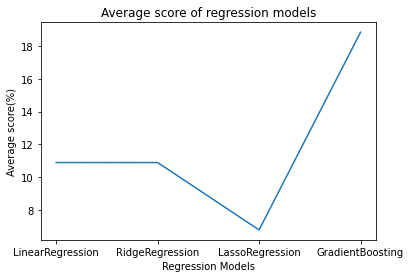

In [79]:

models=['LinearRegression','RidgeRegression','LassoRegression','GradientBoosting']
Average_score=[10.900,10.902,6.807,18.822]
plt.title('Average score of regression models')
plt.xlabel('Regression Models')
plt.ylabel('Average score(%)')
plt.plot(models,Average_score)

Though linear and ridge regressions are almost having similar accuracy, linear regression gave approximately accurate score when predicting delay by taking some examples. The most ideal result would be an RMSE value of zero and R-squared value of 1, but that's almost impossible in real economic datasets